In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew,entropy
from skimage.feature import graycomatrix, graycoprops
import os  
import seaborn as sns #Biblioteca para plotear datos con plantillas específicas.
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

In [2]:
#Funcion que recibe la ruta de un directorio con imágenes y el número de etiqueta de las imágenes (Lesion:1 y No lesion:0)
def ImagesToDataFrame(pathFiles):
    dh1 = pd.DataFrame(columns=['Mean', 'Variance', 'StD', 'Kurtosis', 'Max', 'Min', 'Skewness', 'Entropy', 'Constrast', 'Correlation', 'Energy', 'Homogeneity','Name'], dtype='float64')

    onlyfiles = [ f for f in listdir(pathFiles) if isfile(join(pathFiles,f)) ]
    images = numpy.empty(len(onlyfiles), dtype=object)
    for n in range(0, len(onlyfiles)):
    #     print(join(pathFiles,onlyfiles[n]))
        images[n] = cv2.imread(join(pathFiles,onlyfiles[n]) )
        names = onlyfiles[n]
        name = names[0:5]
        ######################################
        ######################################
        # Se Binariza la imagen 
        ######################################
        ######################################
        grayImage = cv2.cvtColor(images[n], cv2.COLOR_BGR2GRAY)
        Rasgos = grayImage.ravel() 
        Rasgos_no_ceros = [] 
        for index in Rasgos:
            Rasgos_no_ceros.append(index)
        #print(Rasgos_no_ceros)
        Mean = grayImage.mean()
        Variance = grayImage.var()
        StD = grayImage.std()
        Skewness = skew(Rasgos_no_ceros)
        Kurtosis = kurtosis(Rasgos_no_ceros)
        Max = grayImage.max()
        Min = grayImage.min()
        #Skewness = sesgo(grayImage)
        Entropy = entropy(Rasgos_no_ceros)
        ######################################
        ######################################
        # Se determina la estadistica de segundo orden y se añaden a su lista correspondiente
        ######################################
        ######################################      
        #grayImageCrop = cv2.cvtColor(grayImage, cv2.COLOR_BGR2GRAY)
        glcm = graycomatrix(grayImage, [1], [0], 256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        auxi = [Mean, Variance, StD, Kurtosis, int(Max), int(Min), Skewness, Entropy, contrast, correlation, energy, homogeneity, name]
        dh2 = pd.DataFrame([auxi], columns=['Mean', 'Variance', 'StD', 'Kurtosis', 'Max', 'Min', 'Skewness', 'Entropy', 'Constrast', 'Correlation', 'Energy', 'Homogeneity','Name'])
        dh1= pd.concat([dh1, dh2], ignore_index=True)
        #listLabel.append(label)
        #plt.subplot(1,1,1),plt.imshow(grayImage,'gray')
        #plt.show()
    
#     print(dataFrame)
    return(dh1)
#PSA Y SHIFT


In [3]:
pathFiles= '../Alejandro_Proyectos/Imagenes Originales Gris'

df = ImagesToDataFrame(pathFiles)
print(df)

         Mean     Variance        StD  Kurtosis    Max   Min  Skewness  \
0  179.178909  2154.067151  46.411929  0.710867  231.0  16.0 -1.356673   
1  129.707966  2178.757119  46.677158  0.199536  255.0   0.0 -0.857302   
2  129.614513  1790.426813  42.313435 -0.643059  231.0   0.0 -0.307061   
3  124.042511  2290.158280  47.855598 -0.844778  245.0  25.0 -0.082959   
4  161.436714  2301.295884  47.971824  0.406794  236.0   8.0 -0.989403   
5  120.216423  2902.978941  53.879300 -0.878439  228.0   0.0 -0.240168   
6  180.571754  1555.860849  39.444402  2.474082  255.0  12.0 -1.533050   
7  108.238628   583.186743  24.149260  1.909872  235.0   1.0 -0.963135   
8  113.801506  2995.948736  54.735260 -0.442405  255.0   0.0  0.450963   

     Entropy   Constrast  Correlation    Energy  Homogeneity   Name  
0  12.436719  144.788711     0.966298  0.042457     0.322375  F-16_  
1  12.397021  269.678193     0.938114  0.018775     0.152339  boat_  
2  12.418282  478.025459     0.866542  0.011308  

In [4]:
df_NoName =df[['Mean', 'Variance', 'StD', 'Kurtosis', 'Max', 'Min', 'Skewness', 'Entropy', 'Constrast', 'Correlation', 'Energy', 'Homogeneity']]
X_cols= df_NoName.columns.values 
X_cols

array(['Mean', 'Variance', 'StD', 'Kurtosis', 'Max', 'Min', 'Skewness',
       'Entropy', 'Constrast', 'Correlation', 'Energy', 'Homogeneity'],
      dtype=object)

In [5]:
X = df_NoName.values[0:12]
X.shape
X

array([[ 1.79178909e+02,  2.15406715e+03,  4.64119290e+01,
         7.10867150e-01,  2.31000000e+02,  1.60000000e+01,
        -1.35667292e+00,  1.24367193e+01,  1.44788711e+02,
         9.66297970e-01,  4.24568873e-02,  3.22374563e-01],
       [ 1.29707966e+02,  2.17875712e+03,  4.66771584e+01,
         1.99535815e-01,  2.55000000e+02,  0.00000000e+00,
        -8.57302427e-01,  1.23970207e+01,  2.69678193e+02,
         9.38113732e-01,  1.87752927e-02,  1.52339231e-01],
       [ 1.29614513e+02,  1.79042681e+03,  4.23134354e+01,
        -6.43058538e-01,  2.31000000e+02,  0.00000000e+00,
        -3.07060852e-01,  1.24182822e+01,  4.78025459e+02,
         8.66541966e-01,  1.13083134e-02,  9.22055630e-02],
       [ 1.24042511e+02,  2.29015828e+03,  4.78555982e+01,
        -8.44778272e-01,  2.45000000e+02,  2.50000000e+01,
        -8.29590570e-02,  1.23966115e+01,  1.28540202e+02,
         9.71925332e-01,  1.80132846e-02,  2.15432657e-01],
       [ 1.61436714e+02,  2.30129588e+03,  4.7971823

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)


In [7]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(12, 12)

In [8]:
eigenvalues, eigenvectors= np.linalg.eig(cov_m)

In [9]:
eigenvalues
real_evalues=eigenvalues.real





In [10]:
real_evalues.shape

(12,)

In [11]:
eigenvectors.shape


(12, 12)

In [12]:
eigenvectors = eigenvectors.T


In [13]:
eigenvectors[0, :]
real_evectors=eigenvectors.real


In [14]:
eigenvalues = np.cumsum(real_evalues)
eigenvalues /= eigenvalues.max()
eigenvalues
eigenvalues.real



array([0.38268935, 0.66124035, 0.78732602, 0.87242535, 0.94850401,
       0.99282225, 0.9982755 , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [15]:
p = real_evectors[0:10, :]
p.shape

(10, 12)

In [16]:
data_new = np.dot(p, X_scaled.T)
data_new.shape

(10, 9)

In [17]:
data_new = data_new.T
data_new.shape

(9, 10)

In [25]:
df_new = pd.DataFrame(data_new, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])
df_new.head()




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.886118,3.335905,0.298674,0.102103,-0.968305,0.290655,0.109782,-0.251666,5.204147e-15,-1.910405e-14
1,0.384937,-0.957597,-0.670796,-0.002250,0.824324,-1.167856,0.502652,-0.068406,6.009831e-15,-1.927971e-14
2,-0.330691,-3.221637,-0.251028,1.643726,-0.896931,0.784888,0.048742,-0.047241,6.080764e-15,-2.036120e-14
3,1.564160,0.875640,1.365377,0.455051,1.923375,0.947732,0.023504,0.033259,6.122120e-15,-1.996729e-14
4,-0.159834,1.785124,-0.278864,0.198421,-0.920718,0.045504,0.188221,0.336671,7.586096e-15,-2.243913e-14


In [19]:
colum_label =['Plana', 'Intermedia', 'Textura','Plana', 'Intermedia', 'Plana', 'Intermedia', 'Plana', 'Intermedia']
df_label = pd.DataFrame(list(zip(colum_label)),columns=['labels'])

df_new_norm = pd.concat([df,df_label], axis = 1)


In [20]:
df_new_norm.head()

,Mean,Variance,StD,Kurtosis,Max,Min,Skewness,Entropy,Constrast,Correlation,Energy,Homogeneity,Name,labels
0,179.178909,2154.067151,46.411929,0.710867,231.0,16.0,-1.356673,12.436719,144.788711,0.966298,0.042457,0.322375,F-16_,Plana
1,129.707966,2178.757119,46.677158,0.199536,255.0,0.0,-0.857302,12.397021,269.678193,0.938114,0.018775,0.152339,boat_,Intermedia
2,129.614513,1790.426813,42.313435,-0.643059,231.0,0.0,-0.307061,12.418282,478.025459,0.866542,0.011308,0.092206,Baboo,Textura
3,124.042511,2290.158280,47.855598,-0.844778,245.0,25.0,-0.082959,12.396611,128.540202,0.971925,0.018013,0.215433,lena_,Plana
4,161.436714,2301.295884,47.971824,0.406794,236.0,8.0,-0.989403,12.424002,234.867524,0.948465,0.034284,0.299447,house,Intermedia


## Ploteo en 2-D


In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

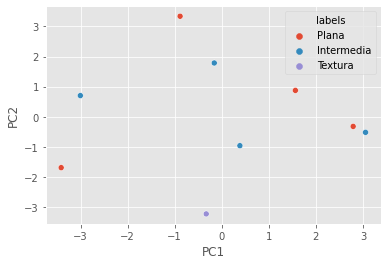

In [24]:
label_1= pd.DataFrame(data=df_new_norm.labels)
df_new1 = pd.concat([df_new,label_1], axis=1, join="inner")

sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_new1)

In [55]:
# Extracción de características con RFE (Recursive Feature Elimination)
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = dataFrameLesion.values
X = array[:,0:12]
Y = array[:,12]
# feature extraction
rfe = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False  True False False False  True False False False]
Feature Ranking: [ 1  2  4  6  1  3  7  5  1  8 10  9]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#prueba 1

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
 

plt.style.use('ggplot')

In [ ]:
dataFrameLesion = ImagesToDataFrame(pathFiles)
